In [1]:
import sys
import os

sys.path.append(os.path.abspath('..'))

import RNACOREX
import InitModel
import pandas as pd
from sklearn.model_selection import train_test_split

import importlib

importlib.reload(RNACOREX)
importlib.reload(InitModel)

sys.path.append(os.path.abspath('..'))

data = pd.read_csv('../Data/data_def.csv', index_col = 0)

X = data.drop('Class', axis = 1)
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rnacorex = RNACOREX.RNACOREX(n_con = 150, precision=2)

rnacorex.fit(X_train, y_train)

rl = rnacorex.predict(X_test)

USING DEFAULT ENGINE


Predicting: 100%|██████████| 1/1 [00:00<00:00,  1.63model/s]


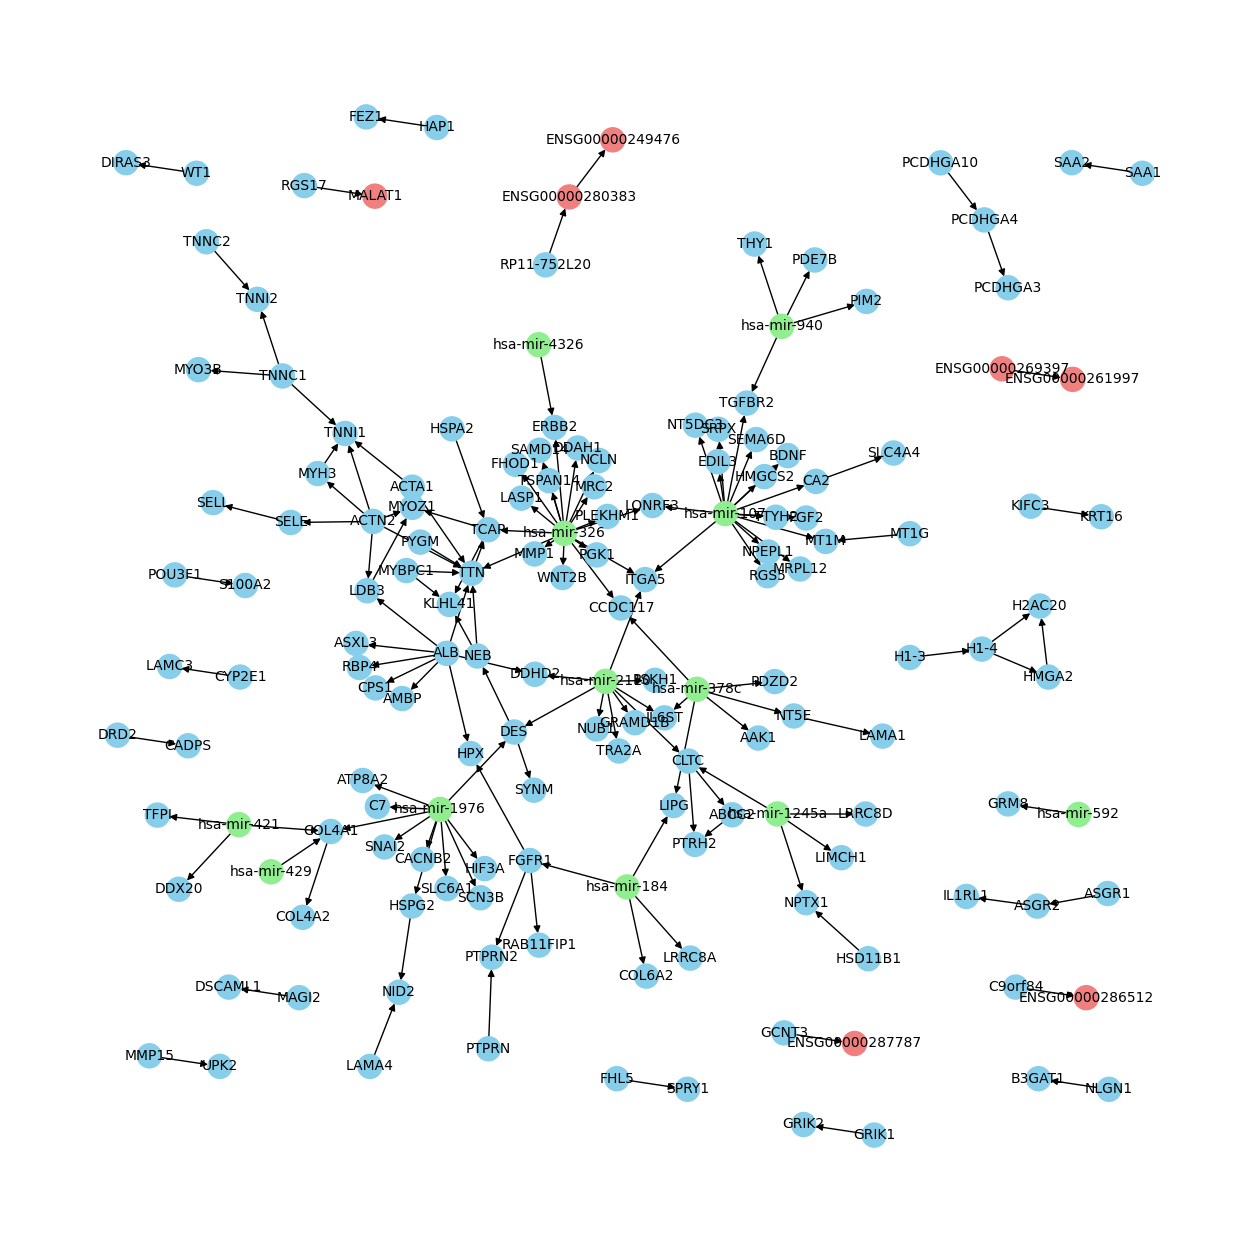

In [2]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import matplotlib.pyplot as plt

G = rnacorex.models_[150]['G']

plt.figure(figsize=(16, 16))

pos = graphviz_layout(G, prog='neato')

node_colors = [G.nodes[node]["color"] for node in G.nodes]

nx.draw_networkx_nodes(G, pos, node_color=node_colors)

nx.draw_networkx_edges(G, pos)

nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

plt.axis('off')
plt.show()

In [4]:
inters = rnacorex.get_interactions(10000)

inters[inters['Type1'] == 'lncRNA']

,Node1,Node2,SMI,FMI,Type1,Type2
85,ENSG00000269397,ENSG00000261997,0.0001,0.790433,lncRNA,lncRNA
121,ENSG00000280383,ENSG00000249476,0.0001,0.404494,lncRNA,lncRNA
259,CASC19,ENSG00000276672,0.0001,0.177598,lncRNA,lncRNA
267,ENSG00000267481,MEMO1,0.0001,0.172487,lncRNA,mRNA
353,MALAT1,hsa-mir-181c,0.0001,0.115577,lncRNA,miRNA
...,...,...,...,...,...,...
9943,MALAT1,hsa-mir-429,0.0000,0.002560,lncRNA,miRNA
9963,MALAT1,hsa-mir-98,0.0000,0.002548,lncRNA,miRNA
9967,ENSG00000243107,hsa-mir-194-2,0.0000,0.002545,lncRNA,miRNA
9969,ENSG00000260997,hsa-mir-3615,0.0000,0.002545,lncRNA,miRNA
